In [125]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable


In [126]:
pip install pydotplus

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


In [127]:
import keras
import numpy as np  
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils  # 用來後續將 label 標籤轉為 one-hot-encoding  
from matplotlib import pyplot as plt
import pydotplus
import graphviz
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import pandas as pd
import numpy as np
import csv
from sklearn.metrics import precision_score, recall_score, f1_score

In [128]:
#File轉換
def FileConvert(s):
    file=['a','b','c','d','e','f','g','h']
    index=0
    for f in range(0,len(file)):
        if s.strip().lower()==file[f].lower():
            index=f+1
    return index

In [129]:
#Y值做One Hot Encoding
def YConvert(y):
    yClass=["draw","zero","one","two","three","four","five","six","seven","eight","nine","ten","eleven","twelve","thirteen","fourteen","fifteen","sixteen"]
    yClassS=[]
    for yy in y:
        yCs=[]
        for yc in range(0,len(yClass)):
            if(yy==yClass[yc]):
                yCs.append(1)
            else:
                yCs.append(0)
        yClassS.append(yCs)
    return yClassS

In [130]:
#純數值陣列轉換
def XYConvert(dataS):
    X=[]
    Y=[]
    for d in dataS.values:
        xx=[]
        for tc in range(0,len(d)-1):
            xx.append(int(d[tc]))
        X.append(xx)
        Y.append(d[len(d)-1])
    return X,YConvert(Y)

In [131]:
#One Hot Encoding 轉換Y值
def ConvertY(dataS):
    dataA=[]
    for d in dataS:
        for dc in range(0,len(d)):
            if (d[dc]==1):
                dataA.append(dc)
                break
    return dataA

In [132]:
#最大值轉換成數字
def MaxCount(dataS):
    array=[]
    for d in dataS:
        max=np.max(d)
        for dc in range(0,len(d)):
            if(max==d[dc]):
                array.append(dc)
                break
    return array

In [133]:
#轉換成0，1
def Convert01(test_pred):
    convert=[]
    for t in test_pred:
        maxI=max(t)
        convertSingle=[]
        for t2 in range(0,len(t)):
            if t[t2]==maxI:
                convertSingle.append(1)
            else:
                convertSingle.append(0)
        convert.append(convertSingle)
    return convert

In [134]:
import pandas as pd
import numpy as np
import csv
from sklearn.model_selection import train_test_split
dataSetPath=r'dataset\original\krkopt.data'
allData=[]
with open(dataSetPath,encoding="utf-8", newline="") as csvData:
  reader = csv.reader(csvData)
  for r in reader:
    if len(r)>0:
      allData.append([FileConvert(r[0]),int(r[1]),FileConvert(r[2]),int(r[3]),FileConvert(r[4]),int(r[5]),r[6]])
allData=np.array(allData)
allData=pd.DataFrame(allData, columns =['WhiteKingFile','WhiteKingRank','WhiteRookFile','WhiteRookRank','BlackKingFile','BlackKingRank','DepthOfWinForWhite'])
training,testing=train_test_split(allData,test_size=0.15, random_state=42)
trainingT,trainingV=train_test_split(training,test_size=len(testing)/len(training), random_state=42)
trainingData=trainingT
validationData=trainingV
testingData=testing


In [135]:
trainingX,trainingY=XYConvert(trainingData)
verifyingX,verifyingY=XYConvert(validationData)
testingX,testingY=XYConvert(testingData)

In [136]:
#實驗:在固定epoch(10)，固定影藏層(2)，修改batch_size(10~50，step=10)是否對績效有影響
bs=[]
for b in range(1,6):
    bs.append(b*10)
accuracy_TrainingBatch=[]
precision_TrainingBatch=[]
recall_TrainingBatch = []
f1_TrainingBatch = []
accuracy_TestBatch=[]
precision_TestBatch=[]
recall_TestBatch = []
f1_TestBatch = []
for b in bs:
    model = Sequential()
    model.add(Dense(1000, input_dim=len(trainingX[0]), activation='relu'))
    model.add(Dense(500, activation='relu'))
    model.add(Dense(300, activation='relu'))
    model.add(Dropout(0.2))
    #最後一層的代表有幾類
    model.add(Dense(18, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(trainingX, trainingY, epochs=10, batch_size=b,validation_data=(verifyingX,verifyingY),verbose=0)
    accuracy_TrainingBatch.append(model.evaluate(trainingX,trainingY,verbose=0)[1])
    accuracy_TestBatch.append(model.evaluate(testingX,testingY,verbose=0)[1])
    training_pred = Convert01(model.predict(trainingX,verbose=0))
    precision_TrainingBatch.append(precision_score(trainingY,training_pred, average='samples'))
    recall_TrainingBatch.append(recall_score(trainingY,training_pred, average='samples'))
    f1_TrainingBatch.append(f1_score(trainingY,training_pred, average='samples'))
    test_pred = Convert01(model.predict(testingX,verbose=0))
    precision_TestBatch.append(precision_score(testingY, test_pred, average='samples'))
    recall_TestBatch.append(recall_score(testingY, test_pred, average='samples'))
    f1_TestBatch.append(f1_score(testingY,test_pred, average='samples'))


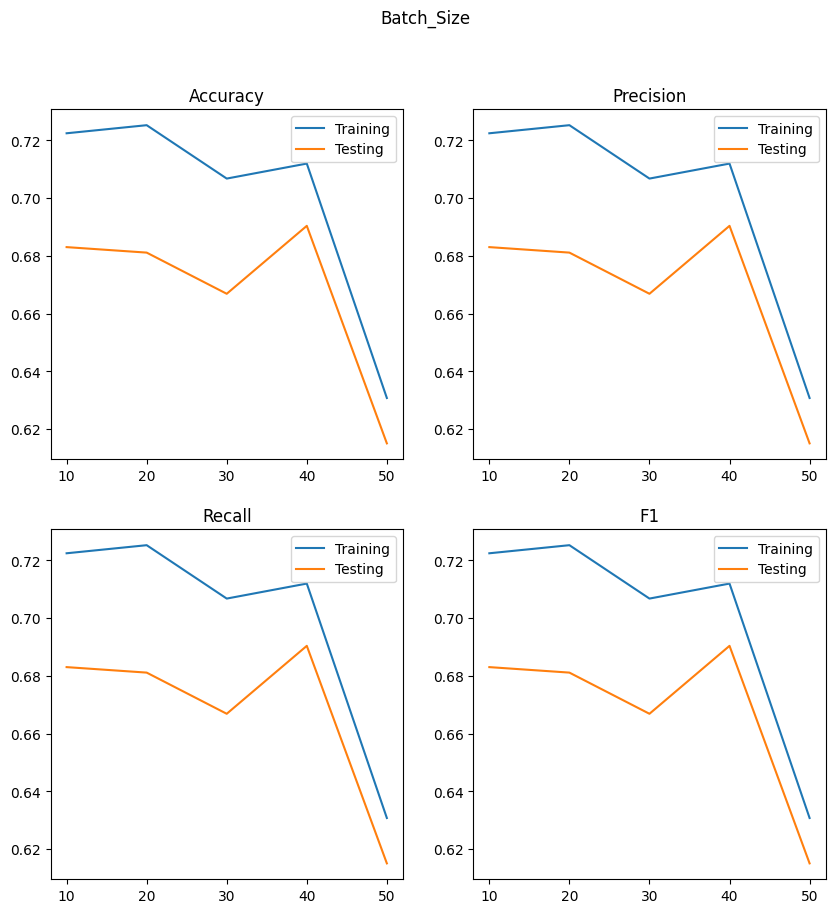

In [137]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
plt.plot(bs,accuracy_TrainingBatch,label="Training")     
plt.plot(bs,accuracy_TestBatch,label="Testing")    
plt.title("Accuracy")
plt.legend()
plt.subplot(2, 2, 2)
plt.plot(bs,precision_TrainingBatch,label="Training")     
plt.plot(bs,precision_TestBatch,label="Testing")
plt.title("Precision")
plt.legend()
plt.subplot(2, 2, 3)
plt.plot(bs,recall_TrainingBatch,label="Training")     
plt.plot(bs,recall_TestBatch,label="Testing")
plt.title("Recall")
plt.legend()
plt.subplot(2, 2, 4)
plt.plot(bs,f1_TrainingBatch,label="Training")     
plt.plot(bs,f1_TestBatch,label="Testing")
plt.title("F1")
plt.legend()
plt.suptitle("Batch_Size")
plt.show()

In [138]:
#實驗:在固定batch_size(10)，固定隱藏層(2)，修改epochs(10~50，step=10)是否對績效有影響
es=[]
for e in range(1,6):
    es.append(e*10)
accuracy_TrainingEpochs=[]
precision_TrainingEpochs=[]
recall_TrainingEpochs = []
f1_TrainingEpochs = []
accuracy_TestEpochs=[]
precision_TestEpochs=[]
recall_TestEpochs = []
f1_TestEpochs= []
for e in es:
    model = Sequential()
    model.add(Dense(1000, input_dim=len(trainingX[0]), activation='relu'))
    model.add(Dense(500, activation='relu'))
    model.add(Dense(300, activation='relu'))
    model.add(Dropout(0.2))
    #最後一層的代表有幾類
    model.add(Dense(18, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(trainingX, trainingY, epochs=e, batch_size=10,validation_data=(verifyingX,verifyingY),verbose=0)
    accuracy_TrainingEpochs.append(model.evaluate(trainingX,trainingY,verbose=0)[1])
    accuracy_TestEpochs.append(model.evaluate(testingX,testingY,verbose=0)[1])
    training_pred = Convert01(model.predict(trainingX,verbose=0))
    precision_TrainingEpochs.append(precision_score(trainingY,training_pred, average='samples'))
    recall_TrainingEpochs.append(recall_score(trainingY,training_pred, average='samples'))
    f1_TrainingEpochs.append(f1_score(trainingY,training_pred, average='samples'))
    test_pred = Convert01(model.predict(testingX,verbose=0))
    precision_TestEpochs.append(precision_score(testingY, test_pred, average='samples'))
    recall_TestEpochs.append(recall_score(testingY, test_pred, average='samples'))
    f1_TestEpochs.append(f1_score(testingY,test_pred, average='samples'))

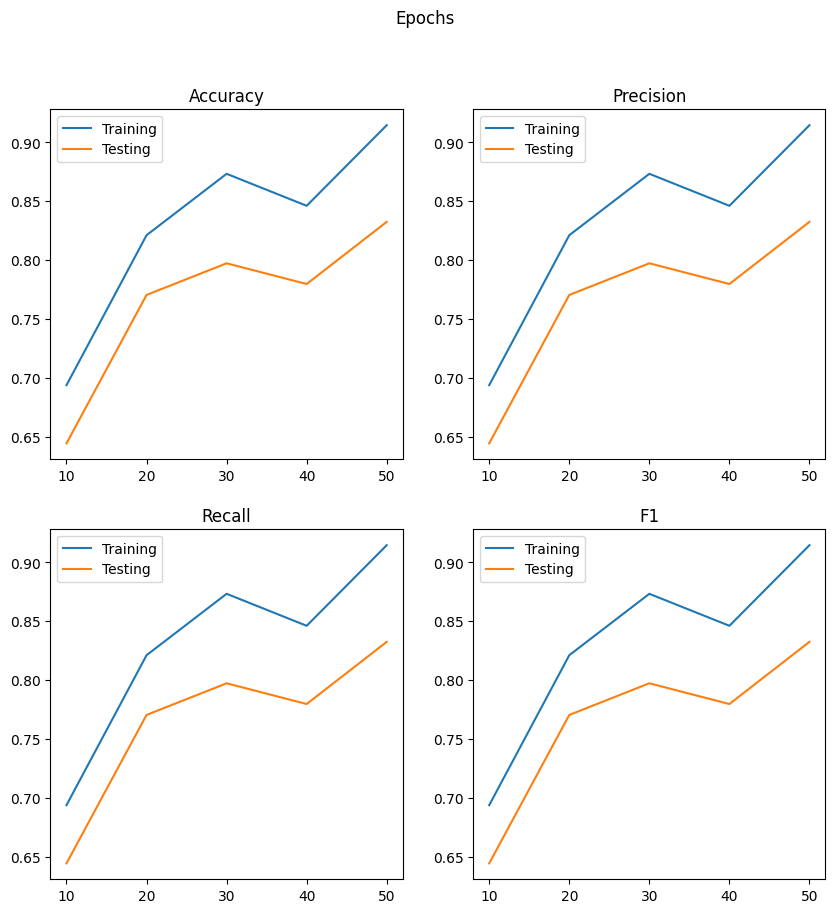

In [139]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
plt.plot(es,accuracy_TrainingEpochs,label="Training")     
plt.plot(es,accuracy_TestEpochs,label="Testing")    
plt.title("Accuracy")
plt.legend()
plt.subplot(2, 2, 2)
plt.plot(es,precision_TrainingEpochs,label="Training")     
plt.plot(es,precision_TestEpochs,label="Testing")
plt.title("Precision")
plt.legend()
plt.subplot(2, 2, 3)
plt.plot(es,recall_TrainingEpochs,label="Training")     
plt.plot(es,recall_TestEpochs,label="Testing")
plt.title("Recall")
plt.legend()
plt.subplot(2, 2, 4)
plt.plot(es,f1_TrainingEpochs,label="Training")     
plt.plot(es,f1_TestEpochs,label="Testing")
plt.title("F1")
plt.legend()
plt.suptitle("Epochs")
plt.show()

In [140]:
#實驗:在固定epoch(10)，固定batch_size(10)，修改隱藏層(1~5)是否對績效有影響
accuracy_TrainingHidelayer=[]
precision_TrainingHidelayer=[]
recall_TrainingHidelayer = []
f1_TrainingHidelayer = []
accuracy_TestHidelayer=[]
precision_TestHidelayer=[]
recall_TestHidelayer = []
f1_TestHidelayer= []
for l in range(1,6):
    model = Sequential()
    model.add(Dense(1000, input_dim=len(trainingX[0]), activation='relu'))
    for l2 in range(0,l):
        model.add(Dense(600-l2*100, activation='relu'))
    model.add(Dropout(0.2))
    #最後一層的代表有幾類
    model.add(Dense(18, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(trainingX, trainingY, epochs=10, batch_size=10,validation_data=(verifyingX,verifyingY),verbose=0)
    accuracy_TrainingHidelayer.append(model.evaluate(trainingX,trainingY,verbose=0)[1])
    accuracy_TestHidelayer.append(model.evaluate(testingX,testingY,verbose=0)[1])
    training_pred = Convert01(model.predict(trainingX,verbose=0))
    precision_TrainingHidelayer.append(precision_score(trainingY,training_pred, average='samples'))
    recall_TrainingHidelayer.append(recall_score(trainingY,training_pred, average='samples'))
    f1_TrainingHidelayer.append(f1_score(trainingY,training_pred, average='samples'))
    test_pred = Convert01(model.predict(testingX,verbose=0))
    precision_TestHidelayer.append(precision_score(testingY, test_pred, average='samples'))
    recall_TestHidelayer.append(recall_score(testingY, test_pred, average='samples'))
    f1_TestHidelayer.append(f1_score(testingY,test_pred, average='samples'))

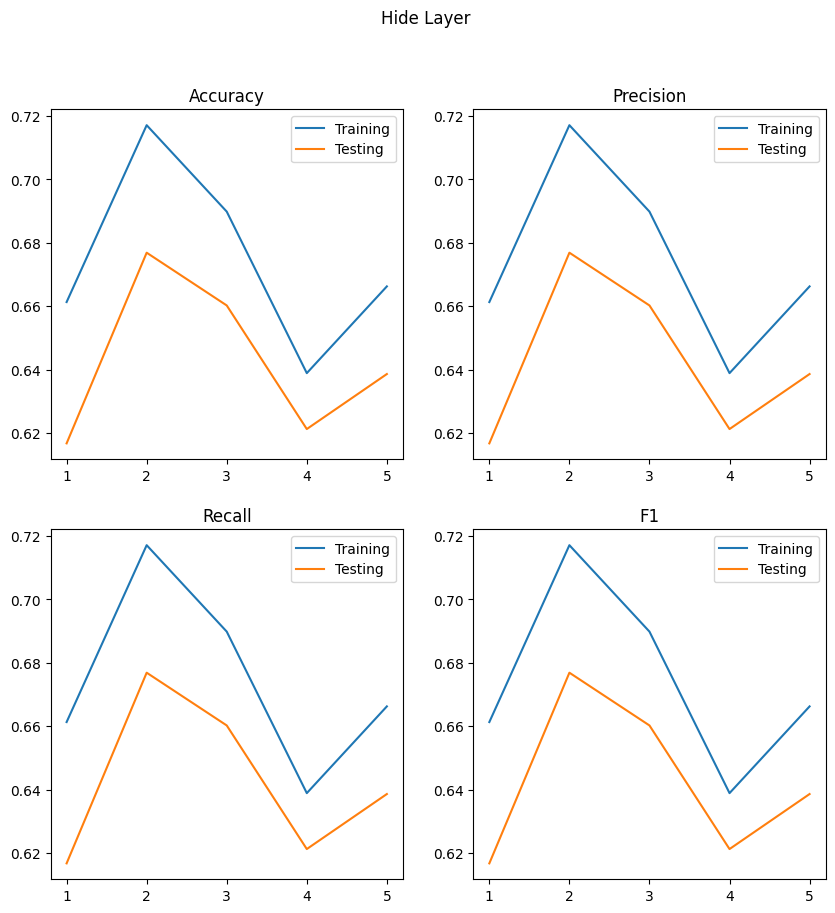

In [142]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
plt.plot([x for x in range(1, 6)],accuracy_TrainingHidelayer,label="Training")     
plt.plot([x for x in range(1, 6)],accuracy_TestHidelayer,label="Testing")    
plt.title("Accuracy")
plt.legend()
plt.subplot(2, 2, 2)
plt.plot([x for x in range(1, 6)],precision_TrainingHidelayer,label="Training")     
plt.plot([x for x in range(1, 6)],precision_TestHidelayer,label="Testing")
plt.title("Precision")
plt.legend()
plt.subplot(2, 2, 3)
plt.plot([x for x in range(1, 6)],recall_TrainingHidelayer,label="Training")     
plt.plot([x for x in range(1, 6)],recall_TestHidelayer,label="Testing")
plt.title("Recall")
plt.legend()
plt.subplot(2, 2, 4)
plt.plot([x for x in range(1, 6)],f1_TrainingHidelayer,label="Training")     
plt.plot([x for x in range(1, 6)],f1_TestHidelayer,label="Testing")
plt.title("F1")
plt.legend()
plt.suptitle("Hide Layer")
plt.show()